In [1]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
import pandas as pd
from pymongo import MongoClient
from datetime import datetime

In [2]:
# setup
db_name = "big_data"
collection_name = "spanish_articles"
start_date = datetime(2019, 4, 29, 0, 0, 0)
end_date = datetime(2019, 5, 8, 0, 0, 0)

client = MongoClient()
db = client[db_name]
articles_collection = db[collection_name]

# init_notebook_mode(connected=True)
cf.set_config_file(offline=True)

## Load data from Mongo and Convert to DF

In [3]:
query_filter = {
    "$and": [
        {"date_publish": {"$gt": start_date}},
        {"date_publish": {"$lt": end_date}}
    ]
}
articles_list = [article for article in articles_collection.find(query_filter)]

In [4]:
df = pd.DataFrame(articles_list)
df.drop(['_id'], axis=1)

,authors,date_modify,date_publish,description,domain,text,title,url
0,[],NaT,2019-05-07 23:54:38,La goleada (4-0) sufrida por el Barcelona este...,www.20minutos.es,La goleada (4-0) sufrida por el Barcelona este...,Los mejores memes de la goleada del Liverpool ...,https://www.20minutos.es/gonzoo/noticia/memes-...
1,[Redacción Elhuffpost],NaT,2019-05-07 23:52:07,El programa de Broncano triunfa como pocos.,www.huffingtonpost.es,La debacle del Barça en Anfield ha dado mucho ...,"Una foto, cuatro palabras y miles de compartid...",https://www.huffingtonpost.es/entry/una-foto-c...
2,[Iñaki Cano],NaT,2019-05-07 23:51:36,"Podía ser más fino a la hora de escribir, pero...",www.20minutos.es,"Podía ser más fino a la hora de escribir, pero...","Barça, ¡vaya cagada!",https://www.20minutos.es/opiniones/inaki-cano-...
3,[],NaT,2019-05-07 23:51:00,Bartomeu evita pronunciarse sobre el futuro de...,www.lavozdegalicia.es,0\nFacebook 0 Twitter 0 WhatsApp 0\nLa Voz de ...,La bochornosa noche de Anfield deja a Valverde...,https://www.lavozdegalicia.es/noticia/deportes...
4,[Redacción El Huffpost],NaT,2019-05-07 23:45:03,El Barça ha sido eliminado de la Champions Lea...,www.huffingtonpost.es,El Barça ha sido eliminado de la Champions Lea...,ENCUESTA: ¿Quién es el culpable de la derrota ...,https://www.huffingtonpost.es/entry/encuesta-q...
5,[],NaT,2019-05-07 23:44:00,Si los de Amsterdam logran defender el 0-1 de ...,www.lavozdegalicia.es,0\nFacebook 0 Twitter 0 WhatsApp 0\nLa Voz de ...,Ajax y Tottenham encaran su partido del siglo,https://www.lavozdegalicia.es/noticia/deportes...
6,[],NaT,2019-05-07 23:43:08,"La escasa concentración del Barça, o quizás el...",www.20minutos.es,"La escasa concentración del Barça, o quizás el...",El increíble despiste del Barça en el cuarto g...,https://www.20minutos.es/deportes/noticia/live...
7,[],NaT,2019-05-07 23:41:02,El Gobierno prepara un amplio plan para tratar...,www.eleconomista.es,El Gobierno prepara un amplio plan para tratar...,El Gobierno subirá el Impuesto de Matriculació...,https://www.eleconomista.es/economia/noticias/...
8,[E. E.],NaT,2019-05-07 23:33:00,El centrocampista español no daba crédito a la...,www.elespanol.com,"Sergio Busquets, centrocampista del Barcelona,...","Busquets: ""Después de lo de Roma que vuelva a ...",https://www.elespanol.com/deportes/futbol/2019...
9,[],NaT,2019-05-07 23:32:48,Apenas seis días antes de que el Barça hincara...,www.20minutos.es,Apenas seis días antes de que el Barça hincara...,"Messi, otra vez desaparecido en una noche de p...",https://www.20minutos.es/deportes/noticia/leo-...


In [31]:
df.describe()

,_id,authors,date_modify,date_publish,description,domain,text,title,url
count,16240,16240,5947,16240,14578,16240,16122,16224,16240
unique,16240,1892,4065,9745,13768,112,14959,15153,16240
top,5cd04f0dd6a423a91091dafd,[],2019-05-04 05:10:49,2019-05-03 00:00:00,"Noticias de El Salvador; fotos, video, reaccio...",www.debate.com.mx,En la botonera superior tiene los aspectos del...,Informándote con Credibilidad,https://www.debate.com.mx/politica/Diputada-pr...
freq,1,9317,12,1791,23,1111,119,63,1
first,NaN,NaN,2019-05-04 05:10:34,2019-04-29 00:03:02,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-05-06 23:57:47,2019-05-07 23:54:38,NaN,NaN,NaN,NaN,NaN


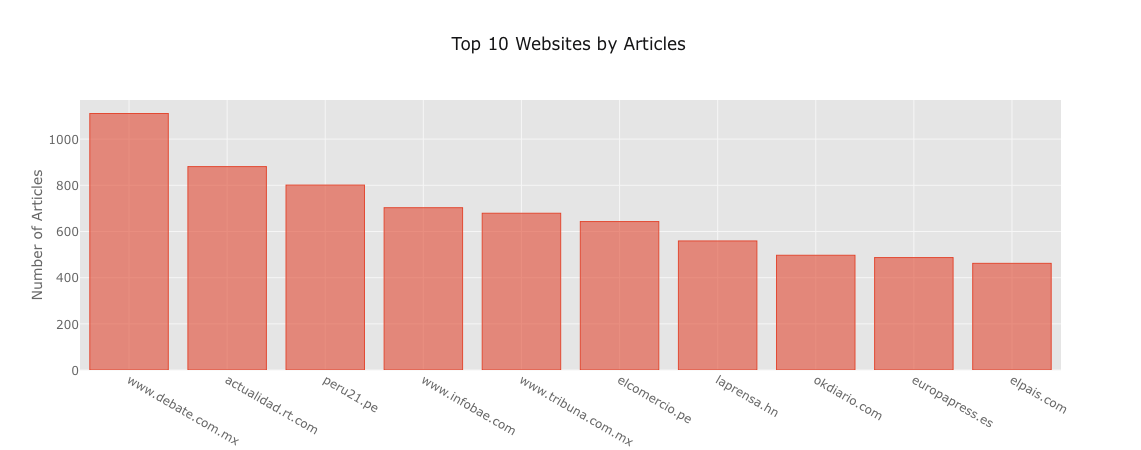

In [11]:
top_values = df.domain.value_counts()[:10]
top_values.iplot(kind='bar', yTitle='Number of Articles', filename="graphs/categorical-num-articles", title="Top 10 Websites by Articles")

In [50]:
datewise_articles = df['date_publish'].dt.dayofyear.value_counts(sort=False).sort_index()
datewise_articles

119     585
120     858
121     645
122    1404
123    3385
124    2689
125    2043
126    2214
127    2417
Name: date_publish, dtype: int64

In [56]:
datewise_articles.index = ['Apr 29', 'Apr 30', 'May 1', 'May 2', 'May 3', 'May 4', 'May 5', 'May 6', 'May 7']

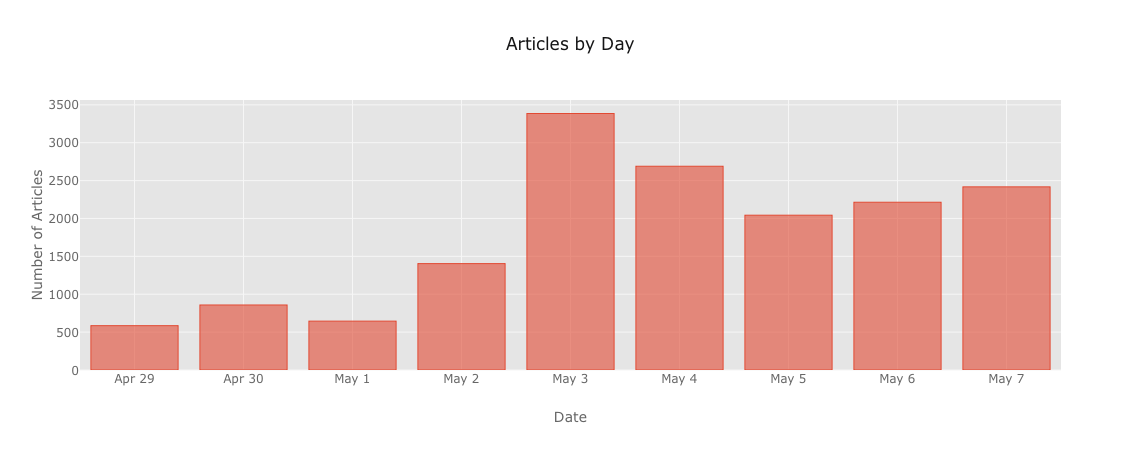

In [58]:
datewise_articles.iplot(kind='bar', xTitle="Date", yTitle="Number of Articles", title="Articles by Day")

# Analysing Doc2Vec Results

In [17]:
doc2vec_colleciton_name = "d2v_calculated"
d2v = db[doc2vec_colleciton_name]

In [18]:
d2v_df = pd.DataFrame([info for info in d2v.find()])
d2v_df.head()

,_id,d2v_dup_count,d2v_sim,date_publish,domain,title,url
0,5cd1f6197e267276133c5b2d,0,{},2019-04-29 23:48:40,europapress.es,Biden se presenta como el candidato de los sin...,https://www.europapress.es/internacional/notic...
1,5cd1f6197e267276133c5b2e,0,{},2019-04-29 23:45:09,abc.es,"Akihito, el modernizador de la monarquía más a...",https://www.abc.es/internacional/abci-akihito-...
2,5cd1f6197e267276133c5b2f,1,"{""https://www.abc.es/motor/reportajes/abci-ope...",2019-04-29 23:30:54,abc.es,Tráfico activa el operativo especial para el p...,https://www.abc.es/sociedad/abci-trafico-activ...
3,5cd1f6197e267276133c5b30,0,{},2019-04-29 23:23:37,analitica.com,No debe haber retardo procesal en caso Requesens,https://www.analitica.com/actualidad/actualida...
4,5cd1f6197e267276133c5b31,0,{},2019-04-29 23:21:50,abc.es,La OMS marca pautas a los niños: tres horas de...,https://www.abc.es/familia/padres-hijos/abci-m...


In [20]:
d2v_df['url'].describe()

count                                                 11026
unique                                                11026
top       https://www.abc.es/sociedad/abci-gobierno-quie...
freq                                                      1
Name: url, dtype: object

In [25]:
duplicate_stats = d2v_df['d2v_dup_count'].value_counts()[1:10]
duplicate_stats

1     981
2     157
3     106
4      51
7      37
6      33
29     32
19     31
22     30
Name: d2v_dup_count, dtype: int64

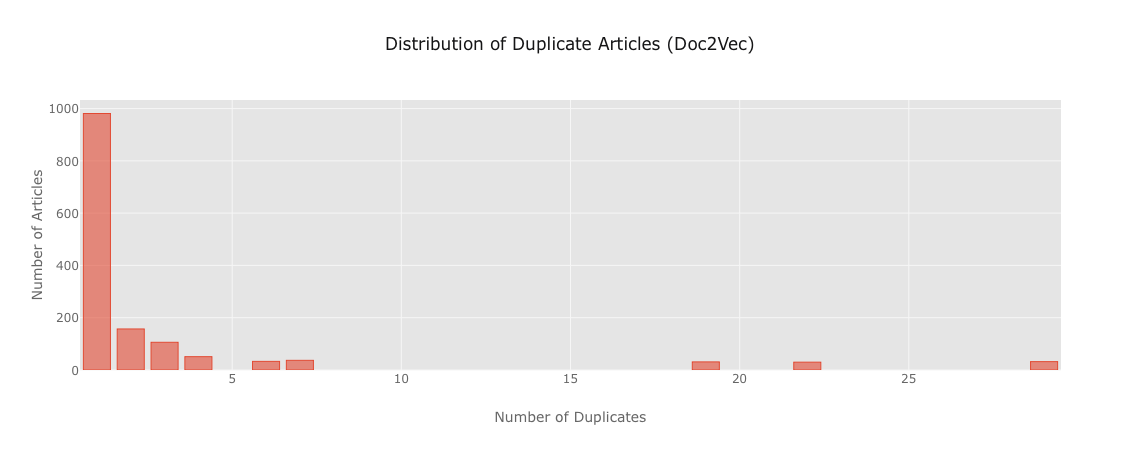

In [29]:
duplicate_stats.iplot(kind='bar', xTitle="Number of Duplicates", yTitle="Number of Articles",title="Distribution of Duplicate Articles (Doc2Vec)")

# Analysing Jaccard Similarity Results

In [59]:
jac_collection_name = 'jacc_sim_calculated'
jac_data = db[jac_collection_name]

In [60]:
jac_df = pd.DataFrame([article for article in jac_data.find()])
jac_df.head()

,SimilarityList,TotalNumDups,_id,url
0,"{""http://www.pasionaguila.com/oficial-definido...",391,5cd264d7527b81300a7df58d,https://www.eleconomista.es/empresa/ZELTIA/gra...
1,"{""http://www.pasionaguila.com/oficial-definido...",386,5cd264d7527b81300a7df591,https://www.eleconomista.es/empresa/GERDAU-PRE...
2,"{""https://www.eleconomista.es/empresa/AKAMAI-T...",199,5cd264d7527b81300a7df595,https://www.eleconomista.es/empresa/PESCANOVA/...
3,"{""http://www.pasionaguila.com/oficial-definido...",392,5cd264d7527b81300a7df599,https://www.eleconomista.es/empresa/SOLARIA/gr...
4,"{""http://www.pasionaguila.com/oficial-definido...",380,5cd264d7527b81300a7df59d,https://www.eleconomista.es/empresa/RENTA-4/gr...


In [61]:
jac_df['TotalNumDups'].describe()

count    2683.000000
mean       56.658218
std        95.902218
min         0.000000
25%         1.000000
50%         7.000000
75%        77.500000
max       407.000000
Name: TotalNumDups, dtype: float64

In [63]:
jac_df['TotalNumDups'].value_counts()

1      961
2      160
3       98
4       41
7       37
6       33
29      32
19      31
15      30
22      30
9       28
8       27
5       22
10      18
13      17
87      15
12      14
40      14
20      14
89      13
85      13
38      13
14      12
17      12
90      11
53      11
144     11
30      11
391     11
47      11
      ... 
206      1
210      1
250      1
218      1
222      1
232      1
238      1
240      1
266      1
282      1
125      1
310      1
119      1
100      1
103      1
104      1
106      1
114      1
120      1
59       1
404      1
382      1
372      1
360      1
152      1
354      1
352      1
346      1
328      1
407      1
Name: TotalNumDups, Length: 265, dtype: int64